In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ==================================
# 1) Leitura dos dados
# ==================================
# Substitua 'seu_sono.csv' pelo nome real do arquivo que contém seus dados de sono
df = pd.read_csv('C:\\Users\\Vinícius Andrade\\Desktop\\machine-learning-introduction\\11-Sleep\\data\\sleep.csv',
                 sep=',', encoding='utf-8')

In [3]:
# ==================================
# 2) Limpeza e Tratamento (Exemplo)
# ==================================

# Exemplo de substituição de '.' por NaN (caso exista no dataset)
df.replace('.', np.nan, inplace=True)

# Exemplo: renomear colunas (opcional, mas pode facilitar)
df.rename(columns={
    "Sleep Score 4 semanas": "Data",
    "Pontuação": "Sleep_Score",
    "Frequência cardíaca em repouso": "FC_reposo",
    "Body Battery": "Body_Battery",
    "Oximetria de pulso": "Ox_pulso",
    "Respiração": "Respiracao",
    "Status de VFC": "VFC_Status",
    "Qualidade": "Qualidade",
    "Duração": "Duracao",
    "Necessidade de sono": "Necessidade_Sono",
    "Hora de dormir": "Hora_dormir",
    "Hora de despertar": "Hora_despertar"
}, inplace=True)

# Removendo linhas duplicadas (caso ocorram)
df.drop_duplicates(inplace=True)

In [4]:
# ==================================
# 3) Converter strings de duração em minutos
# ==================================

def converte_duracao_em_minutos(str_tempo):
    """
    Converte strings como '9h 37min' -> minutos (int).
    Se não conseguir converter, retorna NaN.
    """
    try:
        # Exemplo: "9h 37min" -> separação por 'h' e por 'min'
        tempo = str_tempo.lower().replace(' ', '')
        horas = 0
        minutos = 0

        if 'h' in tempo:
            partes_h = tempo.split('h')
            horas = int(partes_h[0])  # antes do 'h' é a parte das horas

            # depois do 'h', vamos verificar se há 'min'
            if 'min' in partes_h[1]:
                partes_m = partes_h[1].replace('min','')
                if partes_m.isdigit():
                    minutos = int(partes_m)
        return horas * 60 + minutos
    except:
        return np.nan

df['Duracao_min'] = df['Duracao'].apply(converte_duracao_em_minutos)
df['Necessidade_Sono_min'] = df['Necessidade_Sono'].apply(converte_duracao_em_minutos)

In [5]:
# ==================================
# 4) Converter hora de dormir e despertar em datetime
# ==================================
def converte_hora(str_hora):
    """
    Converte '9:49 PM' ou '7:41 AM' em datetime (apenas hora/minuto fixos).
    Ignoramos a data real, usando uma data fictícia 1900-01-01.
    """
    try:
        return pd.to_datetime(str_hora, format='%I:%M %p')
    except:
        return pd.NaT

df['Hora_dormir_dt'] = df['Hora_dormir'].apply(converte_hora)
df['Hora_despertar_dt'] = df['Hora_despertar'].apply(converte_hora)

In [6]:
# ==================================
# 5) Estatísticas Básicas
# ==================================
print("======= Estatísticas Básicas =======")
print(f"Total de registros: {len(df)}")
print("Média de Pontuação (Sleep Score):", df['Sleep_Score'].mean())
print("Média de Duração (min):", df['Duracao_min'].mean())

media_duracao_h = df['Duracao_min'].mean() / 60
print(f"Média de Duração (horas): {media_duracao_h:.2f}")

# Descrição estatística para as colunas principais
print("\nDescrição Estatística (colunas numéricas):")
print(df[['Sleep_Score', 'FC_reposo', 'Body_Battery', 'Ox_pulso',
          'Respiracao', 'Duracao_min', 'Necessidade_Sono_min']].describe())

======= Estatísticas Básicas =======
Total de registros: 27
Média de Pontuação (Sleep Score): 77.62962962962963
Média de Duração (min): 495.9259259259259
Média de Duração (horas): 8.27

Descrição Estatística (colunas numéricas):
       Sleep_Score  FC_reposo  Body_Battery  Respiracao  Duracao_min  \
count    27.000000  27.000000     27.000000   27.000000    27.000000   
mean     77.629630  61.592593     59.444444   13.962963   495.925926   
std      13.362255   4.263073     19.563178    1.159625   102.751353   
min      48.000000  57.000000     21.000000   12.000000   259.000000   
25%      74.000000  59.000000     45.500000   13.000000   431.000000   
50%      83.000000  60.000000     64.000000   14.000000   496.000000   
75%      86.000000  64.000000     74.000000   14.500000   550.500000   
max      91.000000  78.000000     90.000000   16.000000   681.000000   

       Necessidade_Sono_min  
count             27.000000  
mean             474.814815  
std               32.388313  
mi

C:\Users\Vinícius Andrade\AppData\Local\Temp\ipykernel_22628\1985930670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Data', y='Sleep_Score', data=df, palette='viridis')


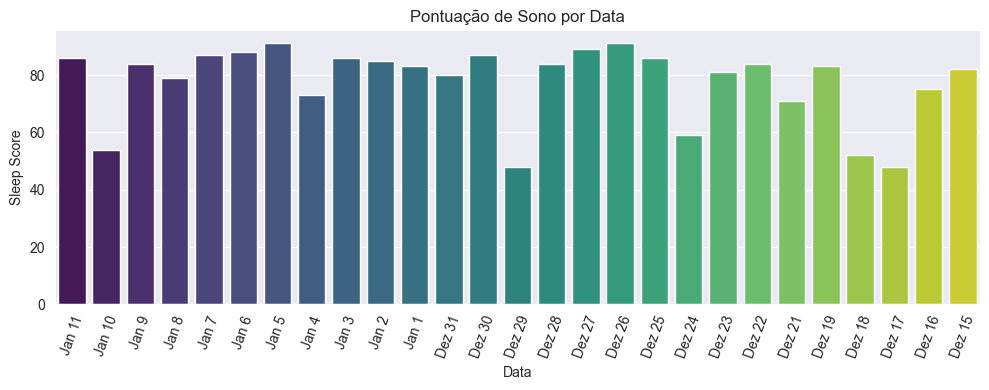

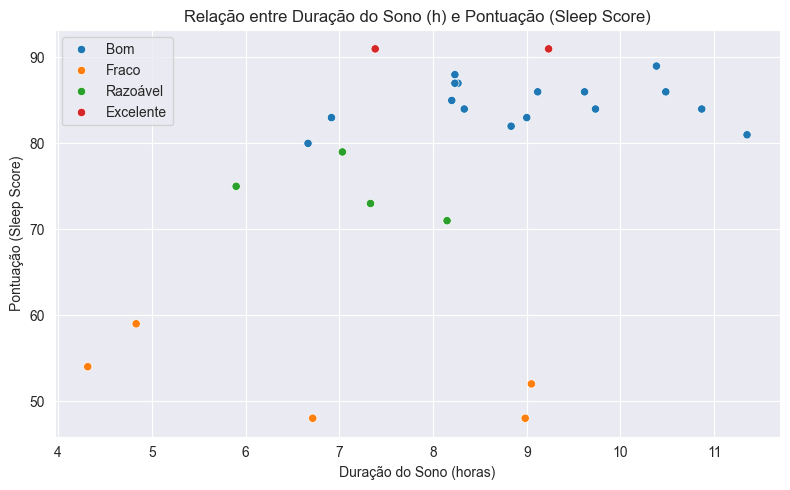

In [7]:
# ==================================
# 6) Visualizações Básicas
# ==================================
plt.figure(figsize=(10,4))
sns.barplot(x='Data', y='Sleep_Score', data=df, palette='viridis')
plt.xticks(rotation=70)
plt.title("Pontuação de Sono por Data")
plt.xlabel("Data")
plt.ylabel("Sleep Score")
plt.tight_layout()
plt.show()

# Scatter plot: Duração x Pontuação
df['Duracao_h'] = df['Duracao_min'] / 60.0
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Duracao_h', y='Sleep_Score', hue='Qualidade')
plt.title("Relação entre Duração do Sono (h) e Pontuação (Sleep Score)")
plt.xlabel("Duração do Sono (horas)")
plt.ylabel("Pontuação (Sleep Score)")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# ==================================
# 7) Exemplo de Análise de Sono Profundo e REM
# ==================================
#
# ATENÇÃO:
#   Você mencionou que o sono profundo deve ser 16% a 33% do total
#   e o sono REM de 21% a 31% do total.
#   Mas seus dados CSV NÃO trazem diretamente esses percentuais.
#   Então, criaremos duas colunas fictícias (Deep_Sleep_% e REM_Sleep_%)
#   para ilustrar como podemos aplicar os critérios.

np.random.seed(42)  # para reprodutibilidade neste exemplo
df['Deep_Sleep_%'] = np.random.randint(10, 40, size=len(df))  # 10% a 39%
df['REM_Sleep_%'] = np.random.randint(15, 35, size=len(df))   # 15% a 34%

def verifica_sono_profundo(pct):
    return (pct >= 16) and (pct <= 33)

def verifica_sono_rem(pct):
    return (pct >= 21) and (pct <= 31)

df['Deep_in_range'] = df['Deep_Sleep_%'].apply(verifica_sono_profundo)
df['REM_in_range']  = df['REM_Sleep_%'].apply(verifica_sono_rem)

# ==================================
# 8) Exibir dicas baseado nos critérios
# ==================================
print("\n===== Análise Sono Profundo e REM (colunas fictícias) =====")
for idx, row in df.iterrows():
    data_str = row['Data']
    deep_pct = row['Deep_Sleep_%']
    rem_pct  = row['REM_Sleep_%']

    # Análise e mensagem
    msg = f"Data: {data_str}\n"
    msg += f" -> Sono Profundo: {deep_pct}%"
    if row['Deep_in_range']:
        msg += " (Dentro da faixa de 16% a 33%)\n"
    else:
        msg += " (Fora da faixa). [Dica: Reduzir estresse, relaxar antes de dormir, exercícios aeróbicos moderados.]\n"

    msg += f" -> Sono REM: {rem_pct}%"
    if row['REM_in_range']:
        msg += " (Dentro da faixa de 21% a 31%)\n"
    else:
        msg += " (Fora da faixa). [Dica: Evitar álcool antes de dormir, aumentar duração total de sono.]\n"

    print(msg)

In [9]:
# 9) Salvando resultados (exemplo)
# ==================================
# Exemplo: vamos salvar uma planilha apenas com Data, Sleep_Score e Duracao_min
df[['Data', 'Sleep_Score', 'Duracao_min', 'Deep_Sleep_%', 'REM_Sleep_%']].to_csv('resultados_sono.csv', index=False)

# Se quiser em Excel:
df[['Data', 'Sleep_Score', 'Duracao_min', 'Deep_Sleep_%', 'REM_Sleep_%']].to_excel('resultados_sono.xlsx', index=False)

# ==================================
# 10) Conclusão
# ==================================
print("\nAnálise de sono concluída!")
print(" - Gráficos exibidos acima.")
print(" - Arquivos 'resultados_sono.csv' e 'resultados_sono.xlsx' salvos (com colunas fictícias de Sono Profundo e REM).")
print("\nResumo das Dicas:")
print(" - Sono profundo ideal: 16% a 33% do total.")
print("   * Reduzir estresse, relaxar corpo/mente antes de dormir, exercícios aeróbicos (não muito tarde).")
print(" - Sono REM ideal: 21% a 31% do total.")
print("   * Evitar álcool antes de dormir, garantir boa duração do sono.")


Análise de sono concluída!
 - Gráficos exibidos acima.
 - Arquivos 'resultados_sono.csv' e 'resultados_sono.xlsx' salvos (com colunas fictícias de Sono Profundo e REM).

Resumo das Dicas:
 - Sono profundo ideal: 16% a 33% do total.
   * Reduzir estresse, relaxar corpo/mente antes de dormir, exercícios aeróbicos (não muito tarde).
 - Sono REM ideal: 21% a 31% do total.
   * Evitar álcool antes de dormir, garantir boa duração do sono.
